# Stacked Bar Plot
> Stacked bar plots

In [ ]:
#hide
import altair as alt
import pandas as pd
import plotnine

from gapminder import gapminder
from plotnine.data import mtcars
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
from plotnine import ggplot  # https://plotnine.readthedocs.io/en/stable/
from bbplot.bbplot import bbc_style

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
alt.renderers.enable('html')

from bbplot.custom_theme import bbc_theme # Custom top-level configuration for charts
alt.themes.register("my_custom_theme", bbc_theme)
alt.themes.enable("my_custom_theme")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ThemeRegistry.enable('my_custom_theme')

In [ ]:
# Prepare data
stacked_bar_df = (
    gapminder.query(' year == 2007')
    .assign(
        lifeExpGrouped=lambda x: pd.cut(
            x['lifeExp'],
            bins=[0, 50, 65, 80, 90],
            labels=["under 50", "50-65", "65-80", "80+"]))
    .groupby(
        ['continent', 'lifeExpGrouped'], as_index=True)
    .agg({'pop': 'sum'})
    .rename(columns={'pop': 'continentPop'})
    .reset_index()
)
stacked_bar_df['lifeExpGrouped'] = pd.Categorical(stacked_bar_df['lifeExpGrouped'], ordered=True)

stacked_bar_df.head(6)

,continent,lifeExpGrouped,continentPop
0,Africa,under 50,376100713.0
1,Africa,50-65,386811458.0
2,Africa,65-80,166627521.0
3,Africa,80+,NaN
4,Americas,under 50,NaN
5,Americas,50-65,8502814.0


# Original plot
![image.png](images/stackedbar_plot.png)

# Python

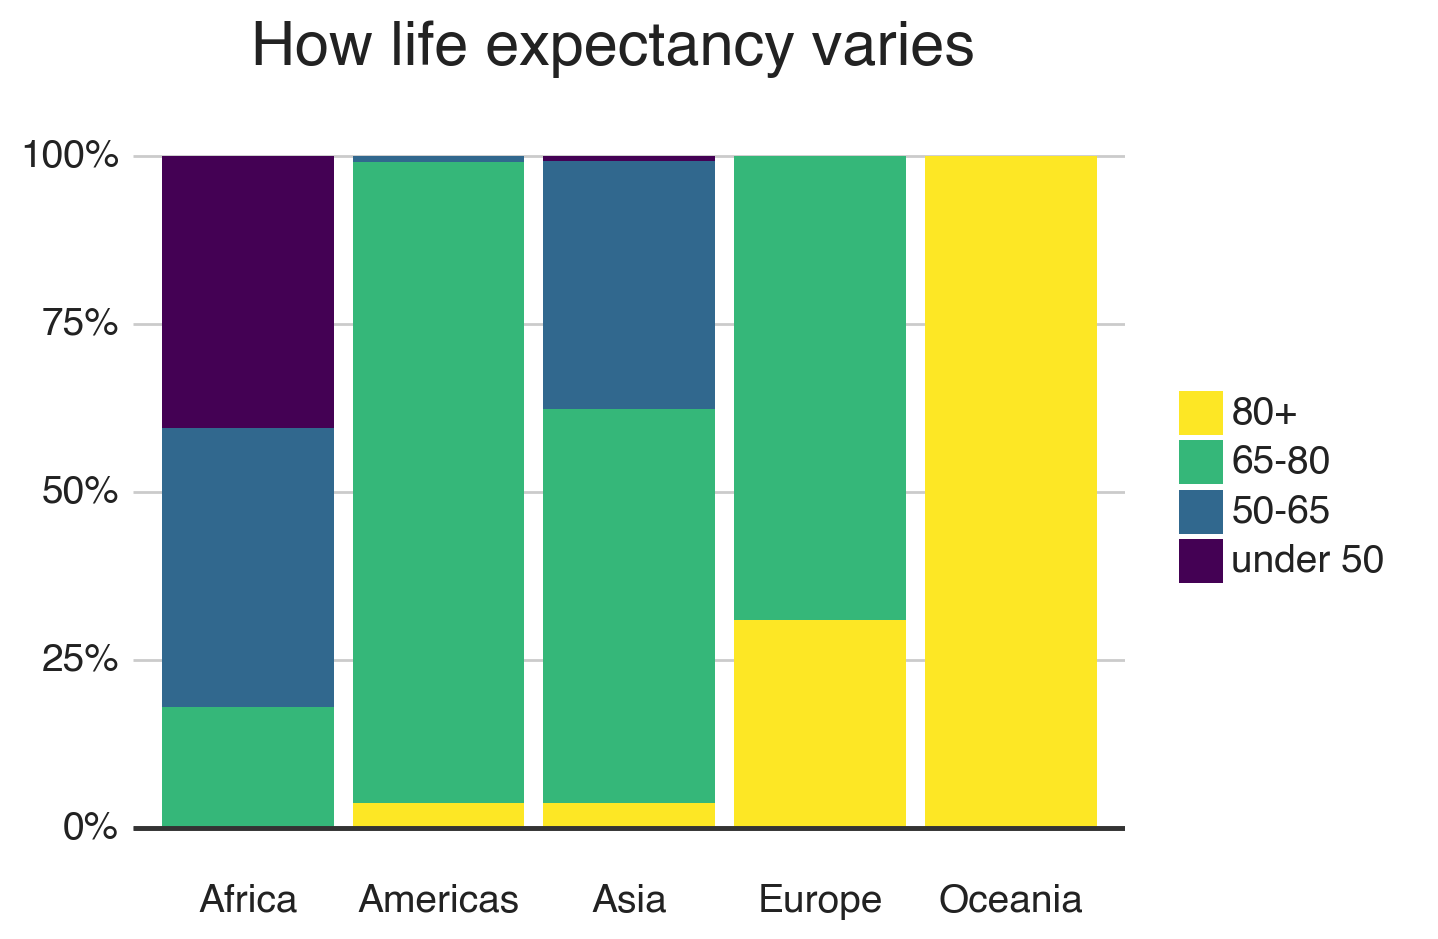

<ggplot: (-9223371911455192980)>

In [ ]:
# plotnine
stacked_bar_ggplot = (
    ggplot(stacked_bar_df,
           aes(x='continent',
               y='continentPop',
               fill='lifeExpGrouped')
           ) +
    geom_bar(stat="identity",
             position="fill") +
      bbc_style() +
    scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    scale_fill_cmap_d() +  # scale_fill_viridis_d
    geom_hline(yintercept=0, size=1, colour="#333333") +
    labs(title="How life expectancy varies",
         subtitle="% of population by life expectancy band, 2007") +

    guides(fill=guide_legend(reverse=True)))

stacked_bar_ggplot

In [ ]:
stacked_bar_df.head(10)

,continent,lifeExpGrouped,continentPop
0,Africa,under 50,3.761007e+08
1,Africa,50-65,3.868115e+08
2,Africa,65-80,1.666275e+08
3,Africa,80+,NaN
4,Americas,under 50,NaN
5,Americas,50-65,8.502814e+06
6,Americas,65-80,8.569782e+08
7,Americas,80+,3.339014e+07
8,Asia,under 50,3.188992e+07
9,Asia,50-65,1.401352e+09


In [ ]:
# altair
stacked_bar_altair = (
    alt.Chart(stacked_bar_df)
    .mark_bar()
    .encode(x='continent:N',
            y=alt.Y('continentPop', stack='normalize',
                    axis=alt.Axis(format='%'),
                   sort=['80+', '65-80', '50-65', 'under 50']),
#                 order=alt.Order(
#       # Sort the segments of the bars by this field
#       'lifeExpGrouped',
#       sort='descending'),
            fill=alt.Fill('lifeExpGrouped:O',
                          scale=alt.Scale(scheme='viridis',
                                          reverse=True,
                                          domain=['under 50','50-65', '65-80', '80+', ],
                                         range=['rgb(253, 231, 37)',
                                                'rgb(53, 183, 121)',
 'rgb(49, 104, 142)',
 
 'rgb(68, 1, 84)']),
                          legend=alt.Legend(title="Life Expectancy")
                         
                         )
           )
    .properties(title={'text': 'How life expectancy varies',
                       'subtitle': '% of population by life expectancy band, 2007'},
                )
)

overay = overlay = pd.DataFrame({'continentPop': [0]})
hline = alt.Chart(overlay).mark_rule(
    color='#333333', strokeWidth=2).encode(y='continentPop:Q')


(stacked_bar_altair + hline).configure_legend(orient ='right')

alt.LayerChart(...)